In [10]:
# 回到根目录
%cd /content

# 删除旧的目录（如果之前 clone 过）
!rm -rf behavior_generation_lecture_python

# 重新 clone 仓库
!git clone https://github.com/Lindbergh7141/behavior_generation_lecture_python.git

# 进入仓库
%cd behavior_generation_lecture_python

# 把 src 目录加入 Python path
import os, sys
sys.path.append(os.path.join(os.getcwd(), "src"))

print("环境准备完毕。当前工作目录：", os.getcwd())


/content
Cloning into 'behavior_generation_lecture_python'...
remote: Enumerating objects: 413, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 413 (delta 108), reused 60 (delta 58), pack-reused 258 (from 1)
Receiving objects: 100% (413/413), 411.00 KiB | 9.34 MiB/s, done.
Resolving deltas: 100% (219/219), done.
/content/behavior_generation_lecture_python
环境准备完毕。当前工作目录： /content/behavior_generation_lecture_python


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

import behavior_generation_lecture_python.vehicle_models.model_comparison as cm
from behavior_generation_lecture_python.utils.plot_vehicle import plot_vehicle as pv
from behavior_generation_lecture_python.utils.vizard import vizard as vz


interactive_widgets = not os.getenv("CI") == "true"
if interactive_widgets:
    # Use widget backend locally, to be able to interact with the plots
    %matplotlib widget
else:
    # Use inline backend in CI, to render the notebooks for the hosted docs
    %matplotlib inline

In [14]:
def main():
    print("Running simulation...")

    def delta(t):
        stwa = 0
        tp = [0.0, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
        dp = [0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0]
        stwa = np.interp(t, tp, dp)

        stwa_ampl = 20 * np.pi / 180
        stwa_ratio = 18

        stwa_max = 520 * np.pi / 180
        stwa = max(min(stwa_max, stwa), -stwa_max)

        delta = stwa_ampl * stwa / stwa_ratio

        return delta

    vars_0 = [0.0, 0.0, 0.0, 0.0, 0.0]
    ti = np.arange(0, 5, 0.05)
    model = cm.CompareModels(vars_0, delta)
    sol = model.simulate(ti, v=30)
    x = sol[0][:, 0]
    y = sol[0][:, 1]
    psi = sol[0][:, 2]
    beta = sol[0][:, 3]
    r = sol[0][:, 4]
    beta_lin = sol[1][:, 0]
    r_lin = sol[1][:, 1]

    delta_vals = [delta(t) for t in ti]

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.axis("equal")

    ax2.plot(ti, delta_vals, "k-")
    ax2.plot(ti, beta, "r-")
    ax2.plot(ti, r, "g-")
    ax2.plot(ti, beta_lin, "m-")
    ax2.plot(ti, r_lin, "b-")

    ax2.legend(["delta", "beta", "r", "beta_lin", "r_lin"])

    (point1,) = ax1.plot([], [], marker="o", color="blue", ms=10)
    (point_delta,) = ax2.plot([], [], marker="o", color="black", ms=3)
    (point_beta,) = ax2.plot([], [], marker="o", color="red", ms=3)
    (point_r,) = ax2.plot([], [], marker="o", color="green", ms=3)
    (point_beta_lin,) = ax2.plot([], [], marker="o", color="magenta", ms=3)
    (point_r_lin,) = ax2.plot([], [], marker="o", color="blue", ms=3)

    def update(i, *fargs):
        slice_ = slice(i + 1, i + 2)
        [l.remove() for l in reversed(ax1.lines)]
        ax1.plot(x[: i + 1], y[: i + 1], "b-", linewidth=0.5)
        point1.set_data(x[slice_], y[slice_])
        pv.plot_vehicle(ax1, x[i], y[i], psi[i], delta_vals[i])

        point_delta.set_data(ti[slice_], delta_vals[slice_])
        point_beta.set_data(ti[slice_], beta[slice_])
        point_r.set_data(ti[slice_], r[slice_])
        point_beta_lin.set_data(ti[slice_], beta_lin[slice_])
        point_r_lin.set_data(ti[slice_], r_lin[slice_])
        for farg in fargs:
            print(farg)

    viz = vz.Vizard(fig, update, ti)
    plt.show()

Running simulation...


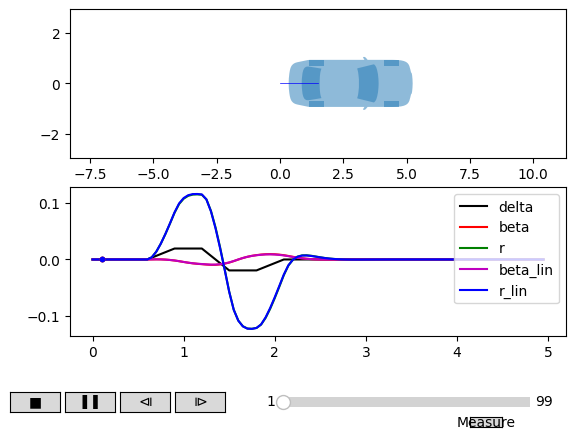

In [15]:
main()